# 1. Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("C:/Users/Imen/Documents/Emission_CO2/greenwashing/building-energy-cleaned.csv")
data.shape

(1548, 27)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OSEBuildingID             1548 non-null   int64  
 1   DataYear                  1548 non-null   int64  
 2   BuildingType              1548 non-null   object 
 3   PrimaryPropertyType       1548 non-null   object 
 4   PropertyName              1548 non-null   object 
 5   Address                   1548 non-null   object 
 6   State                     1548 non-null   object 
 7   ZipCode                   1535 non-null   float64
 8   Neighborhood              1548 non-null   object 
 9   NumberofBuildings         1548 non-null   float64
 10  NumberofFloors            1548 non-null   int64  
 11  PropertyGFATotal          1548 non-null   int64  
 12  LargestPropertyUseType    1548 non-null   object 
 13  YearsENERGYSTARCertified  97 non-null     object 
 14  ENERGYST

In [4]:
data.describe()

,OSEBuildingID,DataYear,ZipCode,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance
count,1548.000000,1548.0,1535.000000,1548.000000,1548.000000,1.548000e+03,997.000000,1.548000e+03,1.548000e+03,1.548000e+03,1.548000e+03,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.0,1548.00000,1548.000000
mean,16497.944444,2016.0,98116.776547,1.178941,4.276486,1.213321e+05,63.635908,8.860058e+06,5.511831e+05,6.140840e+06,2.038297e+06,193.608908,54.355943,1.952842,0.934666,0.065334,inf,inf,2.720660
std,13827.877766,0.0,18.695570,3.039221,6.780694,3.062944e+05,28.825309,3.130568e+07,5.718502e+06,2.151071e+07,9.710667e+06,779.105278,32.886918,1.243355,0.144040,0.144040,NaN,NaN,2.187473
min,1.000000,2016.0,98006.000000,0.000000,0.000000,1.128500e+04,1.000000,5.713320e+04,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,1.000000,1.000000,0.104980,0.000000,4300.0,221.69700,0.021130
25%,602.750000,2016.0,98104.000000,1.000000,1.000000,2.884325e+04,44.000000,1.251083e+06,0.000000e+00,7.308642e+05,0.000000e+00,20.655000,27.000000,1.000000,1.000000,0.000000,28672.0,12960.00000,0.836309
50%,21180.500000,2016.0,98109.000000,1.000000,2.000000,4.815900e+04,71.000000,2.732167e+06,0.000000e+00,1.746086e+06,4.881350e+05,49.845000,50.500000,2.000000,1.000000,0.000000,48229.5,22365.35000,2.097849
75%,24609.000000,2016.0,98125.000000,1.000000,4.000000,1.076615e+05,88.000000,7.294487e+06,0.000000e+00,5.264935e+06,1.530812e+06,147.227500,86.000000,2.000000,1.000000,0.000000,112644.0,37458.47125,4.098127
max,50226.000000,2016.0,98199.000000,111.000000,99.000000,9.320156e+06,100.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,116.000000,13.000000,1.000000,0.895020,inf,inf,8.843544


In [5]:
data[(data.GFAPerBuilding == np.inf) | (data.GFAPerFloor == np.inf)].head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,State,ZipCode,Neighborhood,NumberofBuildings,...,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance
56,89,2016,NonResidential,Medical Office,Polyclinic North && South,1200 Harvard Ave,WA,98122.0,EAST,0.0,...,9886484.0,6814570.0,430.84,51,1,1.00000,0.00000,inf,59671.333,0.658562
69,113,2016,NonResidential,Small- and Mid-Sized Office,KCTS9,401 Mercer St,WA,98109.0,MAGNOLIA / QUEEN ANNE,0.0,...,4166305.0,0.0,29.04,30,5,0.96449,0.03551,inf,33120.000,1.438289
126,257,2016,NonResidential,Warehouse,Harbor Island: Warehouse E - DNRP-SWD,3235 16TH AVE SW,WA,98134.0,GREATER DUWAMISH,0.0,...,2411402.0,0.0,16.81,100,1,1.00000,0.00000,inf,19900.000,2.452644
130,267,2016,NonResidential,Hotel,Grand Hyatt Seattle,721 Pine St,WA,98101.0,DOWNTOWN,1.0,...,39364114.0,25683162.0,1638.46,17,5,1.00000,0.00000,934292.0,inf,0.455683
152,322,2016,NonResidential,Large Office,Cox Media Group Seattle KIRO TV (322),2801 3rd Ave,WA,98121.0,DOWNTOWN,0.0,...,9788716.0,0.0,68.24,48,1,0.73464,0.26536,inf,33578.000,1.186739


In [6]:
data.isnull().sum()

OSEBuildingID                  0
DataYear                       0
BuildingType                   0
PrimaryPropertyType            0
PropertyName                   0
Address                        0
State                          0
ZipCode                       13
Neighborhood                   0
NumberofBuildings              0
NumberofFloors                 0
PropertyGFATotal               0
LargestPropertyUseType         0
YearsENERGYSTARCertified    1451
ENERGYSTARScore              551
SiteEnergyUse(kBtu)            0
SteamUse(kBtu)                 0
Electricity(kBtu)              0
NaturalGas(kBtu)               0
TotalGHGEmissions              0
BuildingAge                    0
TotalUseTypeNumber             0
GFABuildingRate                0
GFAParkingRate                 0
GFAPerBuilding                 0
GFAPerFloor                    0
harvesine_distance             0
dtype: int64

In [7]:
data['GFAPerBuilding'] = np.where(((data.GFAPerBuilding == np.inf) & (data.NumberofBuildings == 0)),0, data.GFAPerBuilding)
data['GFAPerFloor'] = np.where(((data.GFAPerFloor == np.inf) & (data.NumberofFloors == 0)),0, data.GFAPerFloor)

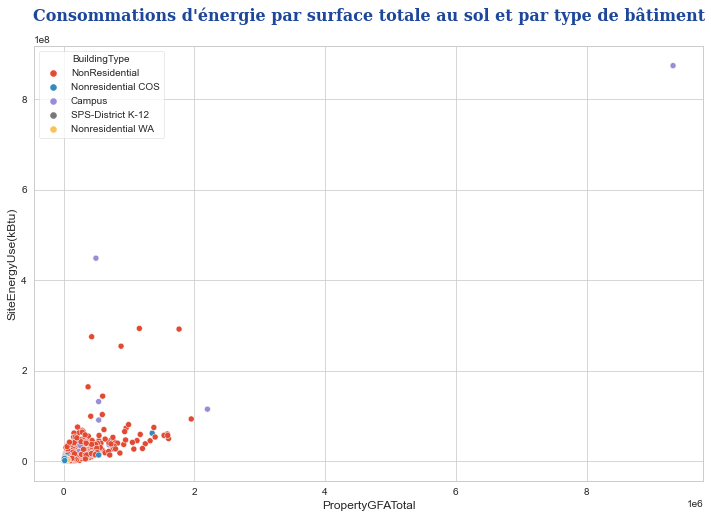

In [8]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommations d'énergie par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.show()

In [9]:
data[data['SiteEnergyUse(kBtu)']>8*10**8]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,State,ZipCode,Neighborhood,NumberofBuildings,...,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance
1510,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,WA,98105.0,NORTHEAST,111.0,...,657074389.0,0.0,11140.56,116,1,1.0,0.0,83965.369,0.0,3.612662


In [10]:
data = data[data['SiteEnergyUse(kBtu)']<8*10**8]

In [11]:
identification_features = ['OSEBuildingID', 'PropertyName', 'Address', 'ZipCode']
data_identification = data[identification_features]
data.drop(identification_features, axis=1, inplace = True)

In [12]:
data_filter = data.drop(['SteamUse(kBtu)','Electricity(kBtu)',
                         'NaturalGas(kBtu)'], axis=1)

In [13]:
data= data.drop(['YearsENERGYSTARCertified','ENERGYSTARScore'], axis=1)

# 1.1. Encodage et standardisation

In [14]:
numerical_features = data_filter.select_dtypes(include=['int64','float64'])
categorical_features = data_filter.select_dtypes(exclude=['int64','float64']) 

In [15]:
categorical_features.nunique()

BuildingType                 5
PrimaryPropertyType         21
State                        1
Neighborhood                19
LargestPropertyUseType      56
YearsENERGYSTARCertified    64
dtype: int64

In [16]:
categorical_features = categorical_features.drop(['State','YearsENERGYSTARCertified'], axis=1)

In [17]:
list(numerical_features.columns)

['DataYear',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'BuildingAge',
 'TotalUseTypeNumber',
 'GFABuildingRate',
 'GFAParkingRate',
 'GFAPerBuilding',
 'GFAPerFloor',
 'harvesine_distance']

In [18]:
energystar_score = numerical_features['ENERGYSTARScore']
numerical_features = numerical_features.drop(['ENERGYSTARScore','DataYear'], axis=1)

In [19]:
data_filter = pd.concat([categorical_features, numerical_features], axis=1)

# Préparation du Preprocessor

In [20]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, RobustScaler
from category_encoders.target_encoder import TargetEncoder
from sklearn.compose import ColumnTransformer

target_features = ['BuildingType','PrimaryPropertyType','Neighborhood','LargestPropertyUseType']
target_transformer = TargetEncoder()

numeric_features = ['harvesine_distance','NumberofBuildings','NumberofFloors',
                    'PropertyGFATotal','BuildingAge','TotalUseTypeNumber',
                    'GFABuildingRate','GFAParkingRate','GFAPerBuilding','GFAPerFloor']
numeric_transformer = RobustScaler(unit_variance=True)

preprocessor = ColumnTransformer(transformers=[
    ('target', target_transformer, target_features),
    ('numeric', numeric_transformer, numeric_features)
])

# 1.2. Préparation des jeux d'entrainement et de test

In [22]:
from sklearn.model_selection import train_test_split

X = data_filter.drop(['TotalGHGEmissions','SiteEnergyUse(kBtu)'], axis=1)
Y = data_filter[['TotalGHGEmissions','SiteEnergyUse(kBtu)']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 1237 lignes,
Test: 310 lignes.



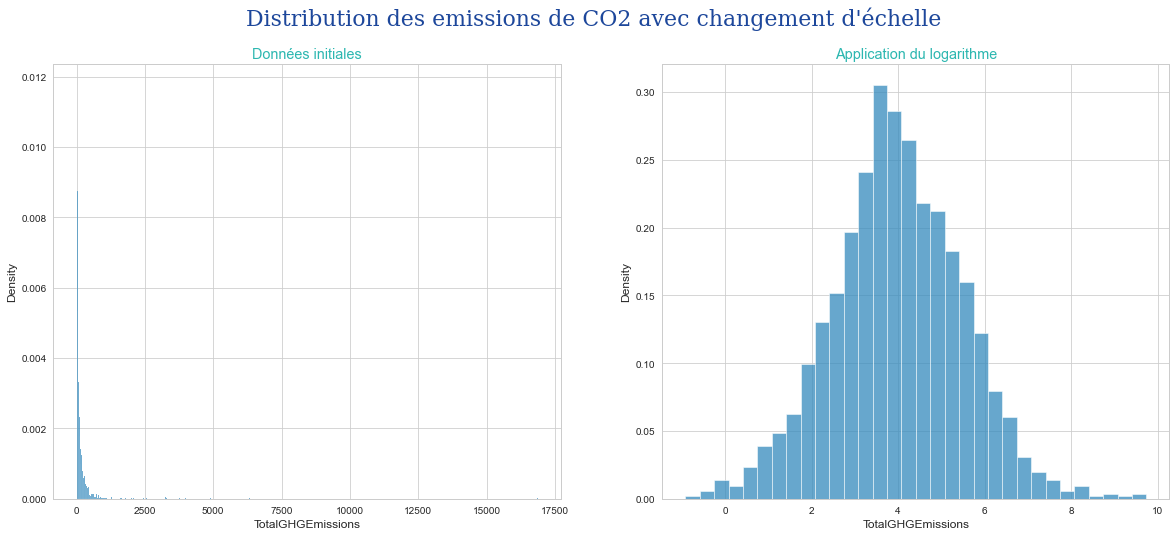

In [23]:
from sklearn.preprocessing import FunctionTransformer

logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
Y_log = logtransformer.transform(Y)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=Y, x='TotalGHGEmissions', stat="density", ax=axes[0])
axes[0].set_title("Données initiales", color='#2cb7b0')
sns.histplot(data=Y_log, x='TotalGHGEmissions', stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme", color='#2cb7b0')
plt.suptitle("Distribution des emissions de CO2 avec changement d'échelle", fontdict=font_title, fontsize=22)
plt.show()

# 2. Modèle Baseline : Régression linéaire multivariée

In [24]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram')


param_mlr = {"regressor__fit_intercept": [True, False],
             "regressor__normalize": [True, False]}

mlr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_mlr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearRegression(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_mlr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

In [25]:
#Retour des meilleurs scores NMAE et R2
#Stockage du dataframe de resultats du modèle
def model_scores(pip,step):
    df_results = pd.DataFrame.from_dict(pip.named_steps[step].cv_results_) \
                    .sort_values('rank_test_neg_mean_absolute_error')
    best_nmae = pip.named_steps[step].best_score_
    best_r2 = np.mean(df_results[df_results.rank_test_r2 == 1]['mean_test_r2'])
    best_params = pip.named_steps[step].best_params_
    training_time = round((np.mean(df_results.mean_fit_time)*X_train.shape[0]),2)
    print("Meilleur score MAE : {}\nMeilleur Score R2 : {}\nMeilleurs paramètres : {}\nTemps moyen d'entrainement : {}s"\
         .format(round(best_nmae,3), round(best_r2,3), best_params, training_time))
    return df_results

In [26]:
#Entrainement sur les 2 variables à expliquer :
GHG_mlr_model = mlr_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_mlr_results = model_scores(GHG_mlr_model, 'grid_search_mlr')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [27]:
SEU_mlr_model = mlr_grid_cv.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_mlr_results = model_scores(SEU_mlr_model, 'grid_search_mlr')

Meilleur score MAE : -12332521.732
Meilleur Score R2 : -27.752
Meilleurs paramètres : {'regressor__fit_intercept': True, 'regressor__normalize': True}
Temps moyen d'entrainement : 24.62s


In [28]:
from sklearn.ensemble import RandomForestRegressor

param_rfr = {'regressor__max_features' : ['sqrt', 'log2'],
             'regressor__max_depth': [5, 15, 25, 50],
             'regressor__min_samples_split': [2, 5, 10],
             'regressor__bootstrap' : [True, False],
             'regressor__min_samples_leaf': [1,2,5,10]}

rfr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_rfr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=RandomForestRegressor(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_rfr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [29]:
GHG_rfr_model = rfr_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_rfr_results = model_scores(GHG_rfr_model, 'grid_search_rfr')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').